In [ ]:
import sys
!{sys.executable} -m pip install pandas numpy matplotlib scikit-learn disarray

In [2]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

import disarray

from sklearn.metrics import ConfusionMatrixDisplay

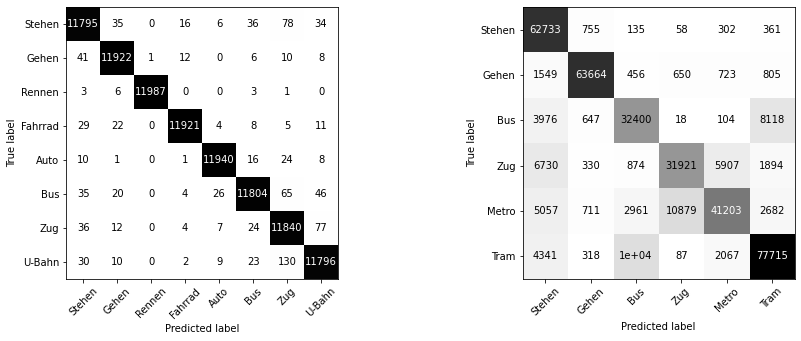

In [3]:
f, axs = plt.subplots(1, 2, figsize=(15,5))

np.set_printoptions(precision=1)

fr_mat = np.array([
    [11795, 35, 0, 16, 6, 36, 78, 34],
    [41, 11922, 1, 12, 0, 6, 10, 8],
    [3, 6, 11987, 0, 0, 3, 1, 0],
    [29, 22, 0, 11921, 4, 8, 5, 11],
    [10, 1, 0, 1, 11940, 16, 24, 8],
    [35, 20, 0, 4, 26, 11804, 65, 46],
    [36, 12, 0, 4, 7, 24, 11840, 77],
    [30, 10, 0, 2, 9, 23, 130, 11796],
])
fr_labels = ['Stehen', 'Gehen', 'Rennen', 'Fahrrad', 'Auto', 'Bus', 'Zug', 'U-Bahn']
fr_disp = ConfusionMatrixDisplay(
    confusion_matrix=fr_mat,
    display_labels=fr_labels
)
fr_disp.plot(cmap=plt.cm.binary, ax=axs[0], colorbar=False, xticks_rotation=45)

df = pd.DataFrame(fr_mat, index=fr_labels, columns=fr_labels)
with open('fr_acc.tex', 'w') as f:
    f.write(df.da.export_metrics(['accuracy']).to_latex())

hemminki_mat = np.array([
    [62733, 755, 135, 58, 302, 361], # Stehend
    [1549, 63664, 456, 650, 723, 805], # Laufend
    [3976, 647, 32400, 18, 104, 8118], # Bus
    [6730, 330, 874, 31921, 5907, 1894], # Zug
    [5057, 711, 2961, 10879, 41203, 2682], # Metro
    [4341, 318, 10123, 87, 2067, 77715], # Tram
])
hemminki_labels = ['Stehen', 'Gehen', 'Bus', 'Zug', 'Metro', 'Tram']
hemminki_disp = ConfusionMatrixDisplay(
    confusion_matrix=hemminki_mat,
    display_labels=hemminki_labels
)
hemminki_disp.plot(cmap=plt.cm.binary, ax=axs[1], colorbar=False, xticks_rotation=45)

df = pd.DataFrame(hemminki_mat, index=hemminki_labels, columns=hemminki_labels)
with open('hemminki_acc.tex', 'w') as f:
    f.write(df.da.export_metrics(['accuracy']).to_latex())

plt.savefig('conf-mat-rw.pdf', dpi=1200, bbox_inches='tight')